In [16]:
import numpy as np 
import pandas as pd 
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import * 
import tqdm
from PIL import Image
import tqdm
import matplotlib.pyplot as plt
import os
import keras
from sklearn.model_selection import train_test_split
import numpy as np

In [19]:
# images = []
# image_paths = os.listdir('/kaggle/input/lhq-1024/dataset')

# for img in tqdm.tqdm(image_paths):
#     path = os.path.join('/kaggle/input/lhq-1024/dataset', img)
#     image = Image.open(path)
#     image = image.resize((224, 224))  
#     image = np.array(image) 
#     image = image.reshape(224, 224, 3)  
#     images.append(image)

# images = np.array(images)
import tensorflow as tf
import os
from PIL import Image

class ImageGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, batch_size):
        self.image_paths = image_paths
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / float(self.batch_size)))


    def __getitem__(self, idx):
        batch_paths = self.image_paths[idx * self.batch_size : (idx+1) * self.batch_size]
        images = []
        for file_name in batch_paths:
            path = os.path.join('/kaggle/input/lhq-1024/dataset', file_name)
            image = Image.open(path)
            image = image.resize((224, 224))
            image = np.array(image)
            image = image.reshape(224, 224, 3)
            images.append(image)
        return np.array(images)

image_paths = os.listdir('/kaggle/input/lhq-1024/dataset')
data_gen = ImageGenerator(image_paths, batch_size=32)



# Get list of image paths
image_paths = os.listdir('/kaggle/input/lhq-1024/dataset')

# Split the image paths into training and testing sets
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, shuffle=True)

# Create data generators for training and testing sets



In [ ]:
train_gen = ImageGenerator(train_paths, batch_size=32)
test_gen = ImageGenerator(test_paths, batch_size=32)

In [7]:
path

'/kaggle/input/lhq-1024/dataset/70594.jpg'

(-0.5, 223.5, 223.5, -0.5)

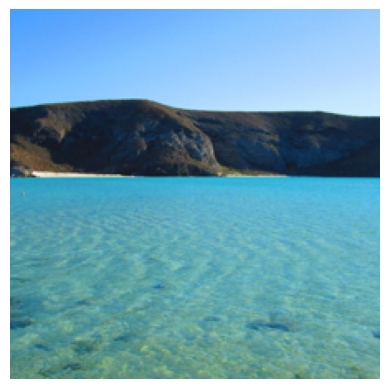

In [10]:
plt.imshow(np.array(images[np.random.randint(100)]))
plt.axis('off')

In [20]:
x_train,x_test=np.array([train_gen.__getitem__(i) for i in range(train_gen.__len__())]),np.array([test_gen.__getitem__(i) for i in range(test_gen.__len__())])


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

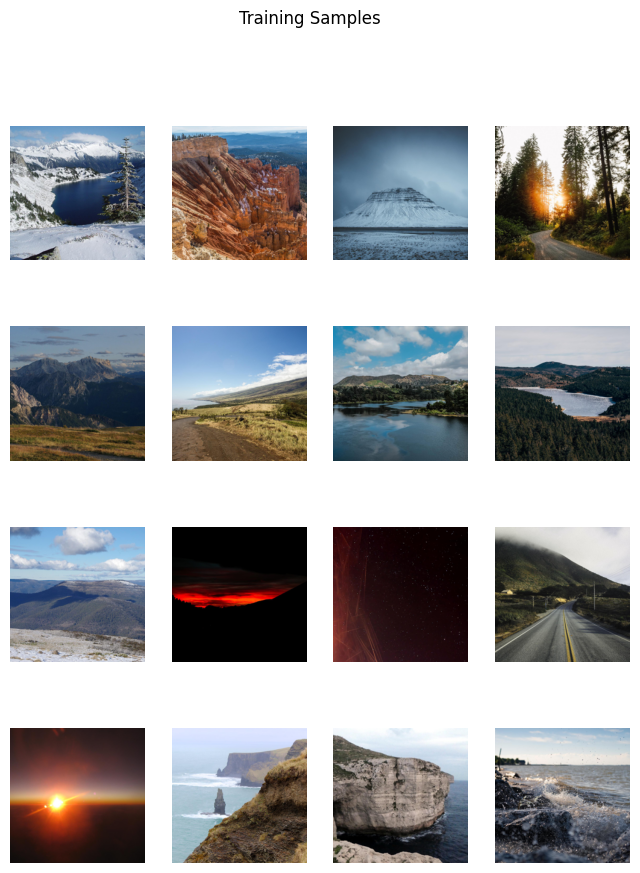

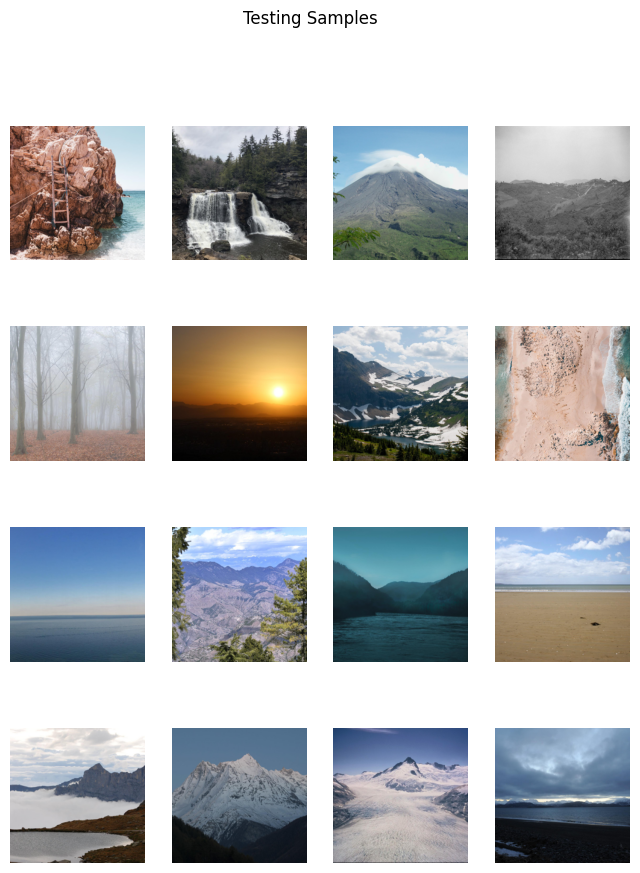

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def display_images(images, title):
    n = len(images)
    sqrt_n = int(np.ceil(np.sqrt(n)))
    fig, axes = plt.subplots(sqrt_n, sqrt_n, figsize=(8, 10))

    for i in range(sqrt_n**2):
        ax = axes[i // sqrt_n, i % sqrt_n]
        if i < n:
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
        else:
            ax.remove()

    plt.suptitle(title)
    plt.show()

# Display some training samples
display_images(x_train[:16], 'Training Samples')

# Display some testing samples
display_images(x_test[:16], 'Testing Samples')


In [9]:
def Gaussing_noising(data_to_noise,mean=0,std=0.5,shape=(224,224,3)):
    noised_data=[]
    gaussin_noise=np.random.normal(mean,std,shape)
    for i in data_to_noise:
        noised_image=i+gaussin_noise
        noised_data.append(noised_image)
    return np.array(noised_data)                                                  

In [30]:
x_train_noised=Gaussing_noising(x_train)
x_test_noised =Gaussing_noising(x_test)

In [33]:
# encoding_dim = 112  
# input_img = tf.keras.Input(shape=(50176,))

# encoded = layers.Dense(512, activation='relu')(input_img)
# encoded = layers.Dense(256, activation='relu')(encoded)
# encoded = layers.Dense(128, activation='relu')(encoded)
# encoded = layers.Dense(64, activation='relu')(encoded)
# encoded = layers.Dense(32, activation='relu')(encoded)
# #-------------------------------------------------------
# encoded_input = tf.keras.Input(shape=(encoding_dim,))
# #-------------------------------------------------------
# decoded = layers.Dense(64, activation='relu')(encoded_input)
# decoded = layers.Dense(128, activation='relu')(decoded)
# decoded = layers.Dense(256, activation='relu')(decoded)
# decoded = layers.Dense(512, activation='relu')(decoded)
# decoded = layers.Dense(50176, activation='sigmoid')(decoded)

# #------------------------------------------
# autoencoder = Model(input_img, decoded)
# #-------------------------------------------
# encoder = Model(input_img, encoded)
# #-------------------------------------------
# # i am Auto_ENcoder I hate Math i Just make model leran weight for me and when i get weights no one en shaa allah could stope me ☻ ☻ ☻ 
# #----------------------------------------------------------------------------------------------------------------------------
# decoder = Model(encoded_input,decoder(encoded))
# #-----------------------------------------------------------------------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras import layers, Model

encoding_dim = 112

# Encoder
input_img = tf.keras.Input(shape=(50176,))
input_img=layers.Flatten()(input_img)
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(50176, activation='sigmoid')(decoded)

#----------------------------------------------------------------
autoencoder = Model(input_img, decoded)
#-----------------------------------------------------------------
#-----------------------------------------------------------------
encoder = Model(input_img, encoded)
#-----------------------------------------------------------------
# Decoder model
encoded_input = tf.keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-5](encoded_input)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(encoded_input, decoder_layer)


In [1]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')
autoencoder.fit(x_train, x_train_noised,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=0.2)

NameError: name 'autoencoder' is not defined

In [ ]:
denoised_Images_from_test_images=autoencoder.predict(x_test_noised)
denoised_Images_from_test_images.reshape(-1,224,224,3)

 * visualization_function 

In [ ]:
import matplotlib.pyplot as plt

def Visualiz(original, noised, denoised, num_samples):
    # Select a random set of images
    indices = np.random.randint(len(original), size=num_samples)
    
    for i, idx in enumerate(indices):
        plt.figure(figsize=(15, 5))
        
        # Displaying original image
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(original[idx])
        plt.title('Original')
        plt.axis('off')
        
        # Displaying noised image
        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(noised[idx])
        plt.title('Noised')
        plt.axis('off')
        
        # Displaying denoised image
        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(denoised[idx])
        plt.title('Denoised')
        plt.axis('off')
    
    plt.show()


In [ ]:
_2D_input_img_size=(224,224,3)
input_rgp_image=keras.Input(_2D_input_img_size)
encoded = layers.conv2d(265,5,activation='relu',padding='same')(input_rgp_image)
encoded = layers.Maxpooling((2,2))(encoded)
encoded = layers.BatchNormalization()(encoded)

encoded = layers.conv2d(512,5,activation='relu',padding='same')(encoded)
encoded = layers.Maxpooling((2,2))(encoded)
encoded = layers.BatchNormalization()(encoded)

encoded = layers.conv2d(512,5,activation='relu',padding='same')(encoded)
encoded = layers.Maxpooling((2,2))(encoded)
encoded = layers.BatchNormalization()(encoded)

encoded = layers.conv2d(1024,5,activation='relu',padding='same')(encoded)
encoded = layers.Maxpooling((2,2))(encoded)
encoded = layers.BatchNormalization()(encoded)


encoded = layers.conv2d(2048,5,activation='relu',padding='same')(encoded)
encoded = layers.Maxpooling((2,2))(encoded)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.conv2d(2048,5,activation='sigmoid',padding='same')(encoded)
#-----------------------------------------------------------------------
 encoded_input = layers.Input(shape=(7, 7, 2048)) #could use decoder and encoder separatly 
#-----------------------------------------------------------------------

decoded = layers.Conv2DTranspose(2048, 5, activation='relu', padding='same')(encoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.BatchNormalization()(decoded)

decoded = layers.Conv2DTranspose(1024, 5, activation='relu', padding='same')(decoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.BatchNormalization()(decoded)

decoded = layers.Conv2DTranspose(512, 5, activation='relu', padding='same')(decoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.BatchNormalization()(decoded)

decoded = layers.Conv2DTranspose(512, 5, activation='relu', padding='same')(decoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.BatchNormalization()(decoded)

decoded = layers.Conv2DTranspose(265, 5, activation='relu', padding='same')(decoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.BatchNormalization()(decoded)

decoded = layers.Conv2D(3, 5, activation='sigmoid', padding='same')(decoded)  # Final layer to match the input shape

encoder=Model(input_rgp_image,encoded)
decoder = Model(encoded_input, decoded(encoded_input))

In [21]:
!pip install --upgrade tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.3 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
